<a href="https://colab.research.google.com/github/yl13340-dev/Data-Science-Bootcamp-Section-1-/blob/main/European_countries_Nate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
df = pd.read_csv("../data/sentimentdataset_cleaned.csv")



In [3]:
# 如果只要唯一的國家名稱
print(df["Country"].unique())


['Usa' 'Canada' 'United Kingdom' 'Australia' 'India' 'France' 'Brazil'
 'Japan' 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa'
 'Spain' 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark'
 'Czech Republic' 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway'
 'Colombia' 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']


Alternatively, if your data is on Google Drive, you can mount your Drive and access files directly:


In [5]:
import pandas as pd


# 1. 讀取資料


# 2. 篩選歐洲國家 (這裡先假設 United Kingdom, France, Germany, Italy, Spain 等)
europe_countries = ["United Kingdom", "France", "Greece", "Sweden", "Italy", "Netherlands", "Germany", "Italy", "Spain", "Portugal", "Switzerland", "Austria", "Belgium", "Denmark", "Czech Republic", "Norway", "Ireland", "Scotland"]
df_europe = df[df["Country"].isin(europe_countries)]

# 3. 檢查基本統計
print("歐洲樣本數:", len(df_europe))
print(df_europe[["Retweets","Likes"]].describe())

# 4. 分析特徵與互動的平均值
features = ["Platform","Sentiment","hashtag_count","emoji_count","LengthGroup"]

for col in features:
    summary = df_europe.groupby(col)[["Retweets","Likes"]].mean().reset_index()
    print(f"\n平均互動依據 {col}:")
    print(summary)

# 5. 如果要看相關性
corr = df_europe[["Retweets","Likes","hashtag_count","emoji_count","text_len","word_count"]].corr()
print("\n相關性矩陣:")
print(corr)

歐洲樣本數: 217
         Retweets       Likes
count  217.000000  217.000000
mean    21.714286   43.211982
std      6.200465   12.351010
min      7.000000   15.000000
25%     18.000000   35.000000
50%     22.000000   45.000000
75%     28.000000   55.000000
max     35.000000   70.000000

平均互動依據 Platform:
    Platform   Retweets      Likes
0   Facebook  21.348485  42.621212
1  Instagram  22.918919  45.689189
2    Twitter  20.870130  41.337662

平均互動依據 Sentiment:
                  Sentiment  Retweets  Likes
0          Acceptance            15.0   30.0
1           Accomplishment       28.0   55.0
2             Adoration          22.0   45.0
3           Adrenaline           22.0   45.0
4                Adventure       28.5   57.5
..                      ...       ...    ...
125          Tenderness          25.0   50.0
126                 Thrill       28.0   55.0
127            Thrill            22.0   45.0
128      Thrilling Journey       22.0   45.0
129   Whispers of the Past       35.0   70.0

[

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# 2. 載入 pandas

# 3. 讀取 CSV 檔案

# 4. 確認欄位
print(df.columns)
df.head()



# 建立二元標籤 (High=1, Low=0)
ret_mean = df["Retweets"].mean()
like_mean = df["Likes"].mean()
df["Retweets_bin"] = (df["Retweets"] >= ret_mean).astype(int)
df["Likes_bin"] = (df["Likes"] >= like_mean).astype(int)

# 特徵 (Text, Hashtags, SentimentSimple, Month, emoji_count)
X = df[["Text", "Hashtags", "SentimentSimple", "Month", "emoji_count"]]

# 前處理：文字用 TF-IDF，類別用 OneHot，數值型 (emoji_count) 用 StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=500), "Text"),
        ("hashtags", TfidfVectorizer(max_features=200), "Hashtags"),
        ("sentiment", OneHotEncoder(handle_unknown="ignore"), ["SentimentSimple"]),
        ("month", OneHotEncoder(handle_unknown="ignore"), ["Month"]),
        ("emoji", StandardScaler(), ["emoji_count"])
    ]
)

# Logistic Regression pipeline
log_reg = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 訓練 & 評估 Retweets 高低
X_train, X_test, y_train, y_test = train_test_split(X, df["Retweets_bin"], test_size=0.2, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Retweets classification report:\n", classification_report(y_test, y_pred))

# 訓練 & 評估 Likes 高低
X_train, X_test, y_train, y_test = train_test_split(X, df["Likes_bin"], test_size=0.2, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Likes classification report:\n", classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'sklearn'

In [9]:
# 1. 匯入套件
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 2. 讀取 CSV 檔案

# 3. 建立二元標籤 (High=1, Low=0)
ret_mean = df["Retweets"].mean()
like_mean = df["Likes"].mean()
df["Retweets_bin"] = (df["Retweets"] >= ret_mean).astype(int)
df["Likes_bin"] = (df["Likes"] >= like_mean).astype(int)

# 4. 特徵欄位
X = df[["Text", "Hashtags", "SentimentSimple", "Month", "emoji_count"]]

# 5. 前處理：文字用 TF-IDF，類別用 OneHot，數值型用 StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=500), "Text"),
        ("hashtags", TfidfVectorizer(max_features=200), "Hashtags"),
        ("sentiment", OneHotEncoder(handle_unknown="ignore"), ["SentimentSimple"]),
        ("month", OneHotEncoder(handle_unknown="ignore"), ["Month"]),
        ("emoji", StandardScaler(), ["emoji_count"])
    ]
)

# 6. 建立兩個 Logistic Regression pipeline
log_reg_ret = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_like = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 7. 訓練 & 評估 Retweets 模型
X_train, X_test, y_train, y_test = train_test_split(X, df["Retweets_bin"], test_size=0.2, random_state=42)
log_reg_ret.fit(X_train, y_train)
y_pred = log_reg_ret.predict(X_test)
print("Retweets classification report:\n", classification_report(y_test, y_pred))
print("Retweets confusion matrix:\n", confusion_matrix(y_test, y_pred))

# 8. 訓練 & 評估 Likes 模型
X_train, X_test, y_train, y_test = train_test_split(X, df["Likes_bin"], test_size=0.2, random_state=42)
log_reg_like.fit(X_train, y_train)
y_pred = log_reg_like.predict(X_test)
print("Likes classification report:\n", classification_report(y_test, y_pred))
print("Likes confusion matrix:\n", confusion_matrix(y_test, y_pred))

Retweets classification report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.66        67
           1       0.72      0.72      0.72        80

    accuracy                           0.69       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.69      0.69      0.69       147

Retweets confusion matrix:
 [[44 23]
 [22 58]]
Likes classification report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67        66
           1       0.74      0.69      0.71        81

    accuracy                           0.69       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.70      0.69      0.69       147

Likes confusion matrix:
 [[46 20]
 [25 56]]


In [7]:

##NEW!!!!!!!!
# 特徵 (新增 word_count, hashtag_count)
df=pd.read_csv("../data/sentimentdataset_cleaned.csv")

# 前處理
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=500), "Text"),
        ("hashtags", TfidfVectorizer(max_features=200), "Hashtags"),
        ("sentiment", OneHotEncoder(handle_unknown="ignore"), ["SentimentSimple"]),
        ("month", OneHotEncoder(handle_unknown="ignore"), ["Month"]),
        ("emoji", StandardScaler(), ["emoji_count"]),
        ("word_count", StandardScaler(), ["word_count"]),
        ("hashtag_count", StandardScaler(), ["hashtag_count"])
    ]
)

# 建立 pipeline
log_reg_ret = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_like = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 訓練 & 評估 Retweets 模型 (歐洲樣本)
X_train, X_test, y_train, y_test = train_test_split(X, df_europe["Retweets_bin"], test_size=0.2, random_state=42)
log_reg_ret.fit(X_train, y_train)
y_pred = log_reg_ret.predict(X_test)
print("Retweets classification report (Europe):\n", classification_report(y_test, y_pred))

# 訓練 & 評估 Likes 模型 (歐洲樣本)
X_train, X_test, y_train, y_test = train_test_split(X, df_europe["Likes_bin"], test_size=0.2, random_state=42)
log_reg_like.fit(X_train, y_train)
y_pred = log_reg_like.predict(X_test)
print("Likes classification report (Europe):\n", classification_report(y_test, y_pred))

NameError: name 'ColumnTransformer' is not defined

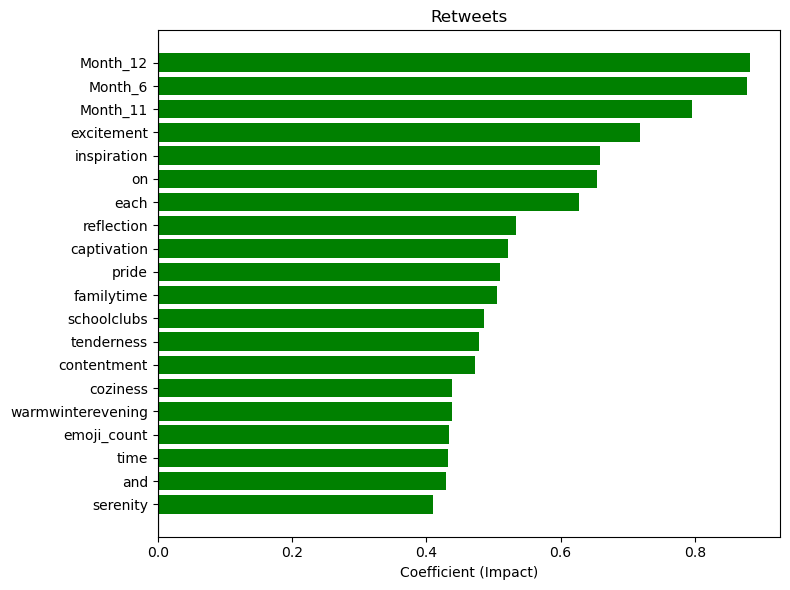


Top 20 features influencing Retweets:
Month_12: 0.883
Month_6: 0.878
Month_11: 0.796
excitement: 0.718
inspiration: 0.659
on: 0.654
each: 0.627
reflection: 0.534
captivation: 0.522
pride: 0.509
familytime: 0.506
schoolclubs: 0.486
tenderness: 0.478
contentment: 0.473
coziness: 0.438
warmwinterevening: 0.438
emoji_count: 0.434
time: 0.432
and: 0.429
serenity: 0.411


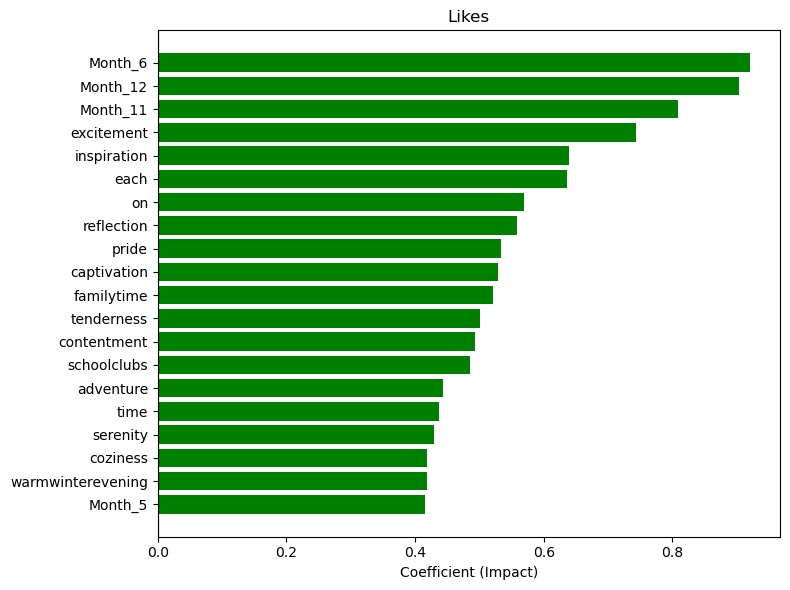


Top 20 features influencing Likes:
Month_6: 0.921
Month_12: 0.904
Month_11: 0.809
excitement: 0.744
inspiration: 0.640
each: 0.637
on: 0.569
reflection: 0.558
pride: 0.534
captivation: 0.529
familytime: 0.521
tenderness: 0.501
contentment: 0.493
schoolclubs: 0.486
adventure: 0.443
time: 0.437
serenity: 0.429
coziness: 0.418
warmwinterevening: 0.418
Month_5: 0.416


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 取得完整特徵名稱
feature_names = []
feature_names.extend(preprocessor.named_transformers_["text"].get_feature_names_out())
feature_names.extend(preprocessor.named_transformers_["hashtags"].get_feature_names_out())
feature_names.extend(preprocessor.named_transformers_["sentiment"].get_feature_names_out(["SentimentSimple"]))
feature_names.extend(preprocessor.named_transformers_["month"].get_feature_names_out(["Month"]))
feature_names.append("emoji_count")

def plot_sorted_features(model, feature_names, title, top_n=20):
    # 取出係數
    coef = model.named_steps["classifier"].coef_[0]
    df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})

    # 依照數值大小排序 (由正到負)
    df = df.sort_values("Coefficient", ascending=False).head(top_n)

    # 顏色：正值綠色，負值紅色
    colors = df["Coefficient"].apply(lambda x: "green" if x > 0 else "red")

    # 繪圖
    plt.figure(figsize=(8,6))
    plt.barh(df["Feature"], df["Coefficient"], color=colors)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title(title)
    plt.xlabel("Coefficient (Impact)")
    plt.gca().invert_yaxis()  # 讓最大值在上方
    plt.tight_layout()
    plt.show()

    # 印出排序結果
    print(f"\nTop {top_n} features influencing {title}:")
    for i, row in df.iterrows():
        print(f"{row['Feature']}: {row['Coefficient']:.3f}")

# 繪製 Retweets 特徵影響
plot_sorted_features(log_reg_ret, feature_names, "Retweets", top_n=20)

# 繪製 Likes 特徵影響
plot_sorted_features(log_reg_like, feature_names, "Likes", top_n=20)

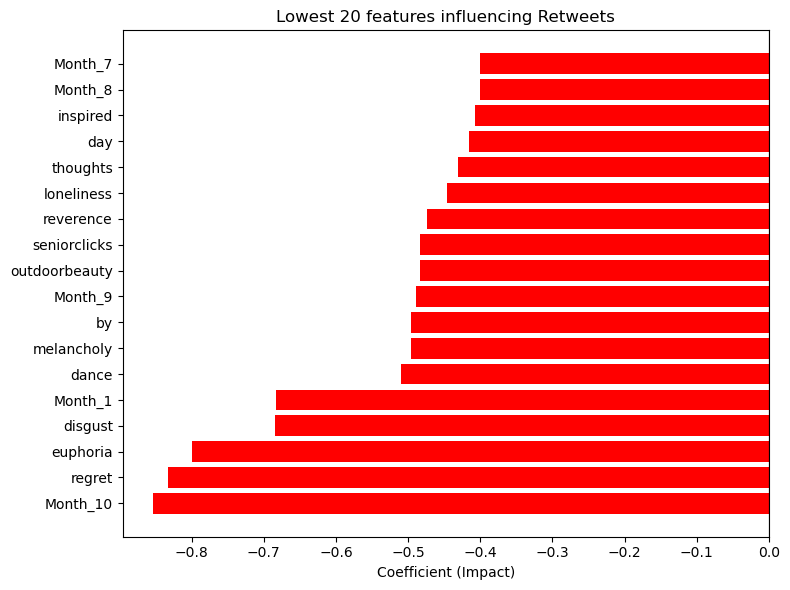


Lowest 20 features influencing Retweets:
Month_10: -0.853
regret: -0.833
euphoria: -0.800
disgust: -0.684
Month_1: -0.683
dance: -0.509
melancholy: -0.497
by: -0.496
Month_9: -0.489
outdoorbeauty: -0.484
seniorclicks: -0.484
reverence: -0.473
loneliness: -0.447
euphoria: -0.440
thoughts: -0.430
day: -0.416
inspired: -0.408
loneliness: -0.400
Month_8: -0.400
Month_7: -0.400


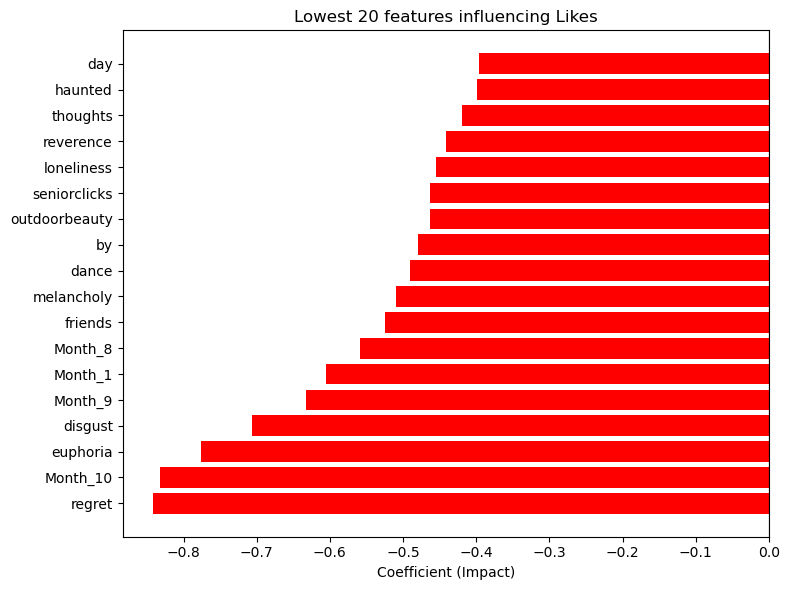


Lowest 20 features influencing Likes:
regret: -0.841
Month_10: -0.832
euphoria: -0.776
disgust: -0.707
Month_9: -0.632
Month_1: -0.605
Month_8: -0.559
friends: -0.525
melancholy: -0.509
dance: -0.491
by: -0.480
outdoorbeauty: -0.463
seniorclicks: -0.463
loneliness: -0.455
reverence: -0.441
euphoria: -0.426
thoughts: -0.419
loneliness: -0.407
haunted: -0.398
day: -0.396


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 取得完整特徵名稱
feature_names = []
feature_names.extend(preprocessor.named_transformers_["text"].get_feature_names_out())
feature_names.extend(preprocessor.named_transformers_["hashtags"].get_feature_names_out())
feature_names.extend(preprocessor.named_transformers_["sentiment"].get_feature_names_out(["SentimentSimple"]))
feature_names.extend(preprocessor.named_transformers_["month"].get_feature_names_out(["Month"]))
feature_names.append("emoji_count")

def plot_lowest_features(model, feature_names, title, bottom_n=20):
    # 取出係數
    coef = model.named_steps["classifier"].coef_[0]
    df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})

    # 依照數值大小排序 (由負到正)，取最低 N 個
    df = df.sort_values("Coefficient", ascending=True).head(bottom_n)

    # 顏色：正值綠色，負值紅色
    colors = df["Coefficient"].apply(lambda x: "green" if x > 0 else "red")

    # 繪圖
    plt.figure(figsize=(8,6))
    plt.barh(df["Feature"], df["Coefficient"], color=colors)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title(f"Lowest {bottom_n} features influencing {title}")
    plt.xlabel("Coefficient (Impact)")
    plt.tight_layout()
    plt.show()

    # 印出排序結果
    print(f"\nLowest {bottom_n} features influencing {title}:")
    for i, row in df.iterrows():
        print(f"{row['Feature']}: {row['Coefficient']:.3f}")

# 顯示 Retweets 最低 20 特徵
plot_lowest_features(log_reg_ret, feature_names, "Retweets", bottom_n=20)

# 顯示 Likes 最低 20 特徵
plot_lowest_features(log_reg_like, feature_names, "Likes", bottom_n=20)
